## Importing libraries....

In [1]:
import os
import pathlib
import numpy as np
import random
import matplotlib.pyplot as plt
import random 
import matplotlib.image as mpimg
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D,Dense,Dropout,MaxPool2D,Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping

### Preprocess Data....

In [2]:
# let's walk through the train data
for dir_path,dir_names ,file_names in os.walk("train/"):
    print(f"There are {len(dir_names)} directories and {len(file_names)} images in {dir_path}")

There are 3 directories and 1 images in train/
There are 0 directories and 237 images in train/adidas
There are 0 directories and 237 images in train/nike
There are 0 directories and 237 images in train/converse


In [3]:
# let's walk through the test data
for dir_path,dir_names ,file_names in os.walk("test/"):
    print(f"There are {len(dir_names)} directories and {len(file_names)} images in {dir_path}")

There are 3 directories and 1 images in test/
There are 0 directories and 38 images in test/adidas
There are 0 directories and 38 images in test/nike
There are 0 directories and 38 images in test/converse


In [4]:
# get the classes names for shoes....
data_dir = pathlib.Path("train/")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
print(class_names)

['.DS_Store' 'adidas' 'converse' 'nike']


In [5]:
# let's make a function for plot a random image....
def plot_random_image(data_dir,target_class):
    
#     this function will plot a random image
    target_folder = data_dir + target_class
    
    random_image = random.sample(os.listdir(target_folder) , 1)
    
    img = mpimg.imread(target_folder + "/" + random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off");
    print(f"Shape of the image {img.shape}")
    

Shape of the image (240, 240, 3)


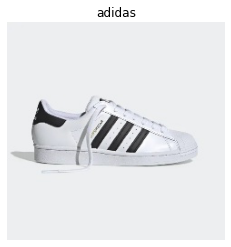

In [6]:
plot_random_image("train/","adidas")

### Data Augmentation...

In [7]:
# set the random seed 
tf.random.set_seed(42)

# directories...
train_dir = "train/"
test_dir = "test/"

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_data = train_datagen.flow_from_directory(train_dir,
                                              batch_size=32,
                                              target_size=(224,224),
                                              class_mode = "categorical")

test_data = test_datagen.flow_from_directory(test_dir,
                                            batch_size=32,
                                            target_size=(224,224),
                                            class_mode="categorical")

Found 711 images belonging to 3 classes.
Found 114 images belonging to 3 classes.


## Model

In [8]:
# it's time to build the model....

# set the random seed 
tf.random.set_seed(42)

model = Sequential(name="Shoe_Model")

# adding the convolution layer....
model.add(Conv2D(filters=128,kernel_size=3,activation="relu",input_shape=(224,224,3)))

# adding the pooling layer
model.add(MaxPool2D(pool_size=(2,2)))

# add the more convolution layers...
model.add(Conv2D(filters=64,kernel_size=3,activation="relu",))

model.add(MaxPool2D(pool_size=(2,2)))

# adding the dropout layer...
model.add(Dropout(0.1))

# add the more convolution layers...
model.add(Conv2D(filters=64,kernel_size=3,activation="relu",))

model.add(MaxPool2D(pool_size=(2,2)))

# adding the dropout layer...
model.add(Dropout(0.1))

# add the more convolution layers...
model.add(Conv2D(filters=64,kernel_size=3,activation="relu",))

model.add(MaxPool2D(pool_size=(2,2)))

# adding the dropout layer...
model.add(Dropout(0.1))

# add the more convolution layers...
model.add(Conv2D(filters=64,kernel_size=3,activation="relu",))

model.add(MaxPool2D(pool_size=(2,2)))

# adding the dropout layer...
model.add(Dropout(0.1))

# adding the final layers...
model.add(Conv2D(filters=32,kernel_size=3,activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())

# adding the output layer...
model.add(Dense(3,activation="sigmoid",name="ouput_layer"))

# compile the model
model.compile(loss="categorical_crossentropy",
             optimizer=tf.keras.optimizers.Adam(),
             metrics=["accuracy"])

# fitting the model
history = model.fit(train_data,
                   epochs = 10,
                   validation_data = test_data,)
#                    callbacks=[EarlyStopping(patience=2)],)

Metal device set to: Apple M1


2022-09-03 20:37:42.654358: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-09-03 20:37:42.654875: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Epoch 1/10


2022-09-03 20:37:42.873000: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-09-03 20:37:43.162650: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


23/23 [==============================] - ETA: 0s - loss: 1.1024 - accuracy: 0.3404

2022-09-03 20:37:56.230783: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


23/23 [==============================] - 14s 579ms/step - loss: 1.1024 - accuracy: 0.3404 - val_loss: 1.0998 - val_accuracy: 0.3333
Epoch 2/10
23/23 [==============================] - 14s 588ms/step - loss: 1.0995 - accuracy: 0.3446 - val_loss: 1.0984 - val_accuracy: 0.3333
Epoch 3/10
23/23 [==============================] - 13s 557ms/step - loss: 1.0989 - accuracy: 0.3432 - val_loss: 1.0981 - val_accuracy: 0.3333
Epoch 4/10
23/23 [==============================] - 13s 562ms/step - loss: 1.0995 - accuracy: 0.3390 - val_loss: 1.0984 - val_accuracy: 0.3158
Epoch 5/10
23/23 [==============================] - 13s 558ms/step - loss: 1.1001 - accuracy: 0.3347 - val_loss: 1.0983 - val_accuracy: 0.3333
Epoch 6/10
23/23 [==============================] - 13s 558ms/step - loss: 1.0985 - accuracy: 0.3277 - val_loss: 1.0979 - val_accuracy: 0.3333
Epoch 7/10
23/23 [==============================] - 13s 562ms/step - loss: 1.0986 - accuracy: 0.3418 - val_loss: 1.0976 - val_accuracy: 0.3421
Epoch 8/10

In [9]:
# check the model layers...
model.summary()

Model: "Shoe_Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 128)     3584      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 128)    0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      73792     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 54, 54, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 64)        3

In [10]:
# let's make a function that will visualize our model performance....

def plot_loss_curves(history):
    
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]
    
    acc = history.history["accuracy"]
    val_acc = history.history["val_accuracy"]
    
    epochs = range(len(loss))
    
#     plot loss
    plt.plot(epochs,loss,label="Training Loss")
    plt.plot(epochs,val_loss,label="Validation Loss")
    plt.xlabel("Epochs")
    plt.title("Loss")
    plt.legend()

#     plot accuracy
    plt.figure()
    plt.plot(epochs,acc,label="Training Accuracy")
    plt.plot(epochs,val_acc,label="Validation Accuracy")
    plt.xlabel("Epochs")
    plt.title("Accuracy")
    plt.legend()
    plt.show()

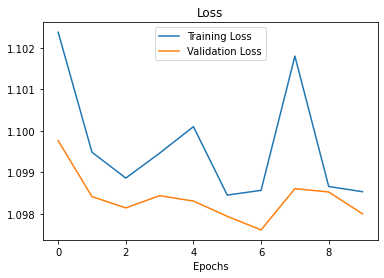

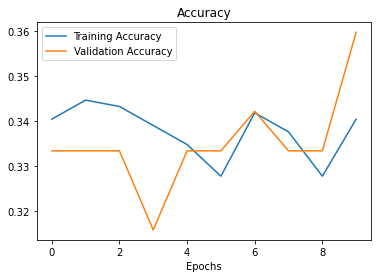

In [11]:
plot_loss_curves(history)

In [12]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [13]:
# let's improve the data-augmentation for better performance....
train_datagen = ImageDataGenerator(rescale=1./255,
                                  rotation_range=0.2,
                                  zoom_range=0.2,
                                  shear_range=0.2,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  horizontal_flip=True)

train_data = train_datagen.flow_from_directory(train_dir,
                                              target_size=(224,224),
                                              batch_size=32,
                                              class_mode="categorical",
                                              )
test_data = train_datagen.flow_from_directory(test_dir,
                                              target_size=(224,224),
                                              batch_size=32,
                                              class_mode="categorical",
                                              )

Found 711 images belonging to 3 classes.
Found 114 images belonging to 3 classes.


In [14]:
# it's time to build the model....

# set the random seed 
tf.random.set_seed(42)

model_1 = Sequential(name="Shoe_Model")

# adding the convolution layer....
model_1.add(Conv2D(filters=128,kernel_size=3,activation="relu",input_shape=(224,224,3)))

# adding the pooling layer
model_1.add(MaxPool2D(pool_size=(2,2)))

# add the more convolution layers...
model_1.add(Conv2D(filters=64,kernel_size=3,activation="relu",))

model_1.add(MaxPool2D(pool_size=(2,2)))

# adding the dropout layer...
model_1.add(Dropout(0.1))

# add the more convolution layers...
model_1.add(Conv2D(filters=64,kernel_size=3,activation="relu",))

model_1.add(MaxPool2D(pool_size=(2,2)))

# adding the dropout layer...
model_1.add(Dropout(0.1))

# add the more convolution layers...
model_1.add(Conv2D(filters=64,kernel_size=3,activation="relu",))

model_1.add(MaxPool2D(pool_size=(2,2)))

# adding the dropout layer...
model_1.add(Dropout(0.1))

# add the more convolution layers...
model_1.add(Conv2D(filters=64,kernel_size=3,activation="relu",))

model_1.add(MaxPool2D(pool_size=(2,2)))

# adding the dropout layer...
model_1.add(Dropout(0.1))

# adding the final layers...
model_1.add(Conv2D(filters=32,kernel_size=3,activation="relu"))
model_1.add(MaxPool2D(pool_size=(2,2)))
model_1.add(Flatten())

# adding the output layer...
model_1.add(Dense(3,activation="sigmoid",name="ouput_layer"))

# compile the model
model_1.compile(loss="categorical_crossentropy",
             optimizer=tf.keras.optimizers.Adam(),
             metrics=["accuracy"])

# fitting the model
history_1 = model_1.fit(train_data,
                   epochs = 10,
                   validation_data = test_data,)

Epoch 1/10


2022-09-03 20:39:54.327525: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


23/23 [==============================] - ETA: 0s - loss: 1.1062 - accuracy: 0.3080

2022-09-03 20:40:07.247470: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


23/23 [==============================] - 14s 586ms/step - loss: 1.1062 - accuracy: 0.3080 - val_loss: 1.0988 - val_accuracy: 0.3333
Epoch 2/10
23/23 [==============================] - 13s 569ms/step - loss: 1.0999 - accuracy: 0.3108 - val_loss: 1.0983 - val_accuracy: 0.3333
Epoch 3/10
23/23 [==============================] - 13s 578ms/step - loss: 1.0995 - accuracy: 0.3024 - val_loss: 1.0986 - val_accuracy: 0.3684
Epoch 4/10
23/23 [==============================] - 13s 572ms/step - loss: 1.0988 - accuracy: 0.3432 - val_loss: 1.0978 - val_accuracy: 0.3509
Epoch 5/10
23/23 [==============================] - 14s 585ms/step - loss: 1.0980 - accuracy: 0.3516 - val_loss: 1.0935 - val_accuracy: 0.3947
Epoch 6/10
23/23 [==============================] - 14s 583ms/step - loss: 1.0962 - accuracy: 0.3727 - val_loss: 1.0878 - val_accuracy: 0.4035
Epoch 7/10
23/23 [==============================] - 14s 586ms/step - loss: 1.0882 - accuracy: 0.3769 - val_loss: 1.0846 - val_accuracy: 0.3596
Epoch 8/10

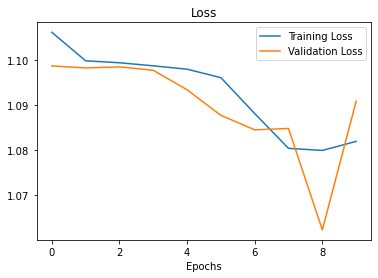

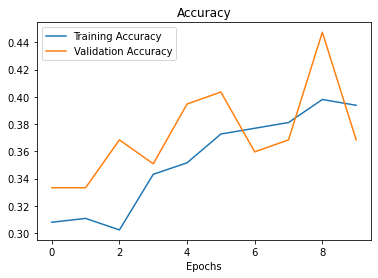

In [15]:
# plot the model performance
plot_loss_curves(history_1)

In [16]:
# create a function that will take image and resize it for model usage
def load_pred(filename,img_shape=224):
    img = tf.io.read_file(filename)
    
    img = tf.image.decode_image(img,channels=3)
    
    img  = tf.image.resize(img,size=[img_shape,img_shape])
    
    img = img/255.
    return img

In [17]:
# make a funciton for prediction...
def pred_plot(model,filename,cname):
    
    img = load_pred(filename)
    
    pred = model.predict(tf.expand_dims(img,axis=0))
    
    label = cname[int(tf.round(pred)[0][0])]
    
    plt.imshow(img)
    plt.title(f"Prediction  {label}")
    plt.axis(False);
    

1/1 [==============================] - 0s 123ms/step


2022-09-03 20:42:08.743926: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


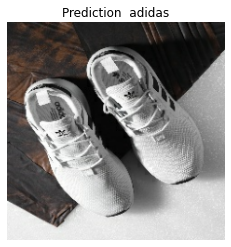

In [18]:
pred_plot(model,"test/adidas/27.jpg",class_names)

In [21]:
print(class_names)

['.DS_Store' 'adidas' 'converse' 'nike']


1/1 [==============================] - 0s 17ms/step


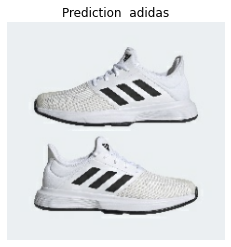

In [24]:
# let's make another prediction with model_1 ....
pred_plot(model_1,"test/adidas/5.jpg",class_names)